# Powered by Pandas
**Authors:** Raymond Tran, Edel Grace Altares<br/>
**Audience:** New programmers w/ a basic understanding of Python, procedural, and object-oriented programming.

Welcome to Powered by Pandas! This workbook is designed to introduce its audience to a little bit of the `pandas` and `matplotlib` Python libraries. The code is thoroughly documented and explained with section headings that give a general idea of what will be explained in a few chunks of code.

**Useful Things in Jupyter:**<br/>
- **Shift + Enter** allows you to execute the currently selected cell, and immediately moves the pointer to the next one for you.
- **Pressing Tab** immediately after a `.` in a line of code like `object.` will showcase all the methods/functions that can be used with that particular class. Note that `pandas` and `matplotlib` have *a lot*.

---
## Getting Started
When Jupyter is installed with Anaconda Navigator, many data analysis modules come with it.

Some other modules that won't be featured include:
- **seaborn**  (A prettier, fancier data visualizer with its own set of features.)
- **networkx** (Graph/Network modelling and manipulation.)
- **scipy**    (A scientific computing library for stuff like optimization, linear algebra, and so on.)
- **sklearn**  (A library for data classification and machine learning!)
- **numpy**    (A module that expands on the concept of arrays that are fast, efficient, and flexible. Numpy arrays are used in pandas internally.)

In [1]:
# Import a module, but refer to it as something else in the code.
# For example, instead of calling pandas every time, just call it pd.
# And, let it know that you don't need to refer to the parent 'pd' every time when playing with DataFrames and Series.
# Without 'from pandas import DataFrame, Series' = pd.DataFrame.head
# With 'from pandas import DataFrame, Series' = Data.head

import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import numpy as np

---
## File IO, DataFrames, and You!

Let's start off by opening a small csv spreadsheet that contains some people, their favourite fruits, and what year in university they are!<br/>
To see what file-types are supported, you can check: [Pandas Doc - IO](https://pandas.pydata.org/pandas-docs/stable/io.html)

In [2]:
# Quick Import.
quickDF = pd.read_clipboard()
quickDF

,ered,by,Pan


In [3]:
# Create a DataFrame called csvDF.
# Then, fill it with the contents of the file.
csvFileName = "fruitsAndPeople.csv"
csvDF = pd.read_csv(csvFileName)
csvDF

,Name,Fav Fruit,Yr. of Study
0,Alex,Apples,2.0
1,Edel,Oranges,NaN
2,Abigail,Pumpkin,NaN
3,Jas,Coconut,1.0


**Dataframes are made up of a bunch of 'Series'** Similar to how matrices are made up of lists.<br/>
We can also add rows and columns of data, merge DataFrames, etc.<br/>
We'll show this by adding a new entry to the frame, as well as a new column.

In [4]:
# Create a row of data. 
newRow1 = {'Name': 'Joe',
          'Fav Fruit': 'Watermelon', 
          'Yr. of Study': 4,
          'Plays Music': True}

# Create a new DataFrame, and put the row of data into it using append()
mergeDF = DataFrame()
# Ignore Index prevents duplicate index values by ensuring a new, unique one is assigned.
mergeDF = mergeDF.append(newRow1, ignore_index=True)

# We can also merge two dataframes like so:
csvDF = csvDF.append(mergeDF, ignore_index=True, sort=False)
#csvDF = csvDF[['Name','Fav Fruit','Yr. of Study','Plays Music']] # Sort the columns by how we know them. (Deprecated line.)
csvDF

,Name,Fav Fruit,Yr. of Study,Plays Music
0,Alex,Apples,2.0,NaN
1,Edel,Oranges,NaN,NaN
2,Abigail,Pumpkin,NaN,NaN
3,Jas,Coconut,1.0,NaN
4,Joe,Watermelon,4.0,1.0


In [5]:
# Insert a column of data.
# Locate the row (nothing), and the column (Total).
# If the column doesn't exist, the DataFrame will create a new one and initialize it with the values.

csvDF.loc[:,"totlA"] = 18 # Oops, a mistake! Let's get rid of it.
csvDF.drop(columns=["totlA"], inplace = True) # The 'inplace' parameter saves the change onto the current object rather than returning.

csvDF.loc[:,"Zero"] = 0
csvDF

,Name,Fav Fruit,Yr. of Study,Plays Music,Zero
0,Alex,Apples,2.0,NaN,0
1,Edel,Oranges,NaN,NaN,0
2,Abigail,Pumpkin,NaN,NaN,0
3,Jas,Coconut,1.0,NaN,0
4,Joe,Watermelon,4.0,1.0,0


---
# Data Manipulation
Let's try importing a really big data file.
We can use DF.head() in order to print the first few entries.

`sales-full.csv` is a massive spreadsheet containing (dummy) data for six separate business men, and how much product they sold on each day.<br />
Let's how big this data set *really* is.

In [6]:
# Import the data into a DataFrame.
salesDF = pd.read_csv("sales-full.csv")

# Check the shape (row x col)
print("Size of sales-full: " + str(salesDF.shape))


Size of sales-full: (300, 7)


In [7]:
# Instead of showing all 300 entries, we can just preview some of the contents with head(), tail(), and/or sample()
# You can pass an int argument to increase/decrease the entries shown. (Default 5)
x = 5

# Show the first x entries.
#salesDF.head(x)

# Show the last x entries.
#salesDF.tail(x)

# Show x randomly picked entries.
salesDF.sample(x)

,day,Seller 1,Seller 2,Seller 3,Seller 4,Seller 5,Seller 6
285,286,489,36,78,172,32,46
254,255,259,83,137,314,242,92
0,1,320,89,21,57,57,107
289,290,80,210,26,530,71,16
208,209,94,318,298,157,25,75


**Let's fix up the column names for our data.** There are many ways to do this.<br/>
1. We can choose to just label them directly, but that means we have to label ALL of them.
2. Alternatively, we can get a copy of the column names, and index the column we want to change.
3. Finally, if we know the name of the column and just want to do some tweaking, we can use the built-in column renaming function.

In [8]:
# Method 1
salesDF.columns = ["Day", "Alex", "Bruce", "Candice", "Denise", "Edel", "Frisk"]
salesDF.head(5)

# Method 2
salesDFColumns = salesDF.columns.values; # Produces a numpy array.
indexOfCandice = list(salesDFColumns).index("Candice") # Produces an ndarray, so we have to convert it to a list first, then get the index.
salesDFColumns[indexOfCandice] = "Carrie"
salesDF.head(5)

# Method 3
# We specify the previous name, and then the new name.
# The 'inplace' parameter ensures we get a new dataframe with the changes made.
salesDF.rename(columns = {'Bruce':'Brandon'}, inplace = True)
salesDF.head(5)

,Day,Alex,Brandon,Carrie,Denise,Edel,Frisk
0,1,320,89,21,57,57,107
1,2,74,386,181,71,29,95
2,3,340,186,151,108,342,78
3,4,322,606,257,96,167,423
4,5,146,78,269,527,321,70


**Now, let's aggregate the data into a new column.**<br/>
This is a really big file, so we can't afford to do the math and manually insert it one by one.
This is where pandas come into play!

In [9]:
# Locate the row (nothing), and the column (Total).
# If the column doesn't exist, the DataFrame will create a new one and initialize it with the values.
salesDF.loc[:,"Day Total"] = 0

salesDFShape = salesDF.shape
print("Shape of salesDF = ",salesDFShape)
salesDFColumns = salesDF.columns.values;

# For every row in salesDF...
for i in range(0, salesDFShape[0]):
    # Reset the total count.
    totalRowVal = 0
    # And for every column after 'Day'
    for j in salesDFColumns[1:]:
        # Aggregate the total across all sellers.
        totalRowVal += salesDF.at[i,j]
    # And then save into the Day Total column for that row.
    salesDF.at[i,"Day Total"] = totalRowVal
    
salesDF.head(5)

Shape of salesDF =  (300, 8)


,Day,Alex,Brandon,Carrie,Denise,Edel,Frisk,Day Total
0,1,320,89,21,57,57,107,651
1,2,74,386,181,71,29,95,836
2,3,340,186,151,108,342,78,1205
3,4,322,606,257,96,167,423,1871
4,5,146,78,269,527,321,70,1411


---
# Visualizing Data
Now, we can try visualizing the data using matplotlib (plt).
matplotlib and pandas play well with each other, and as a result, we can visualize things in multiple ways.
More advanced stuff can always be done with `matplotlib.pyplot`, which also supports DataFrames.

We'll showcase a few ways of visualizing our Seller-Day data, as well as some context to what these visualizations are typically suitable for.

**Histograms**<br/>
Histograms represent your data exactly as is based on a measure.<br/>
They look similar to bar graphs, but differ in that the data isn't 'categorized'.<br/>
Visually, this means the bars are connected to each other, as opposed to having some empty space between each other.<br/>

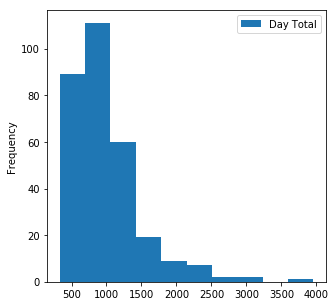

In [10]:
salesDF.plot(kind='hist', x='Day', y='Day Total', figsize=(5,5))

# Another way to plot a histogram.
#salesDF[['Day Total']].hist(grid=False)

We can also use the 'Kernel Density Estimation' plot as another way to represent the distribution of data by probabilities.

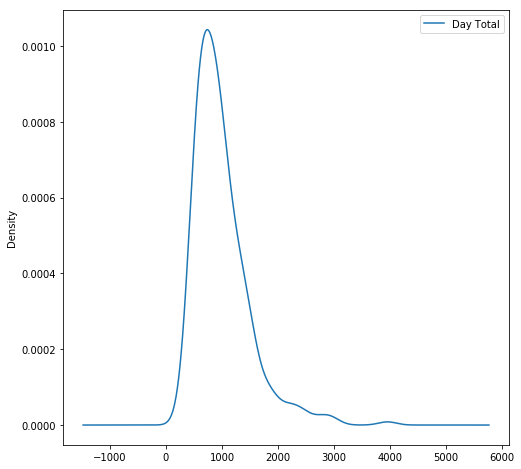

In [11]:
salesDF.plot(kind='kde', x='Day', y='Day Total', figsize=(8,8))

**Bar Graph**<br/>
We can use bar graphs to represent values in particular categories (qualitative data).<br/>
For example, we'll view the results of the first 10 days, and then the results of a particular seller.

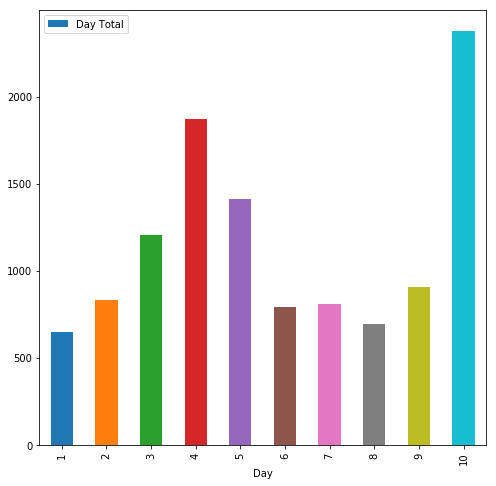

In [12]:
salesDFColumns = salesDF.columns.values;

# Total sales for the first 10 days. Let the graph be an 8in x 8in graph.
salesDF[:10].plot(kind='bar', x='Day', y='Day Total', figsize=(8,8))

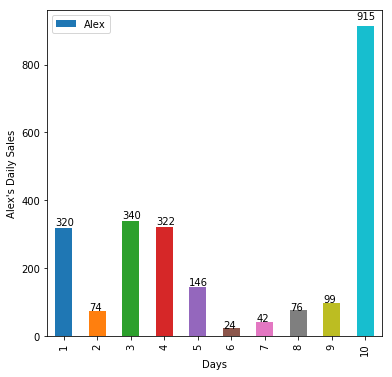

In [13]:
# https://matplotlib.org/api/axes_api.html?highlight=matplotlib%20axes%20axes#module-matplotlib.axes

# We can also turn it into a stacked bar-graph in order to see the breakdowns of each seller.
# You can also optionally store the result of plot in order to add axis labels.
salesBarA = salesDF[:10].plot(kind='bar', x='Day', y='Alex', figsize=(6,6))
salesBarA.set_xlabel("Days")
salesBarA.set_ylabel("Alex's Daily Sales")

# Hardcoded label. (Bad idea.)
#salesBarA.text(x=-0.2, y=330, s='320')

# Automated by annotating each bar (patch) in the graph.
# Needs alignment.
for x in salesBarA.patches:
    salesBarA.annotate(str(x.get_height()), (x.get_x(), x.get_height() * 1.020))

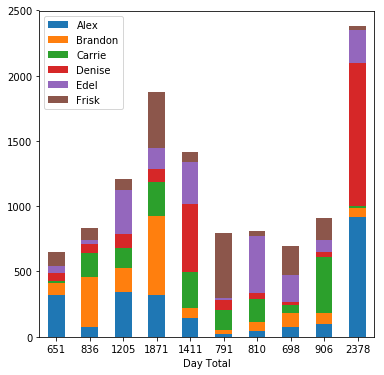

In [14]:
salesDFColumns = salesDF.columns.values;

# Total sales for the first 10 days. Let the graph be a 6in x 6in stacked bar graph.
salesDF[:10].plot(kind='bar', x='Day Total', y=salesDFColumns[1:7], figsize=(6,6), rot=0, stacked=True)

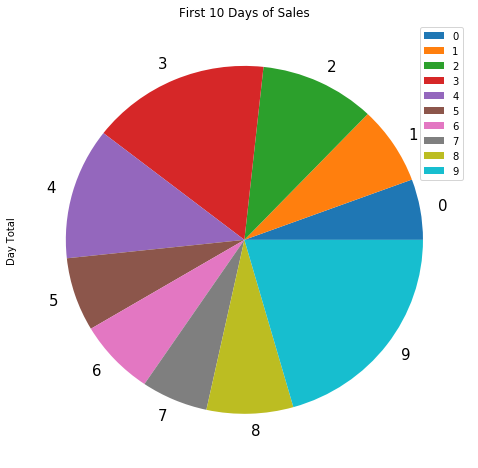

In [15]:
# Pie chart. We can also change the colour-palette using the 'colormap' parameter.
# Set1/2 sucks.
salesDF[:10].plot(kind='pie', title="First 10 Days of Sales", y='Day Total', figsize=(8,8), fontsize=15, colormap="tab10")

#https://matplotlib.org/users/colormaps.html

**Area/Density Graphs**<br/>
Area/Density graphs are great for quantitative/numbers-based data.

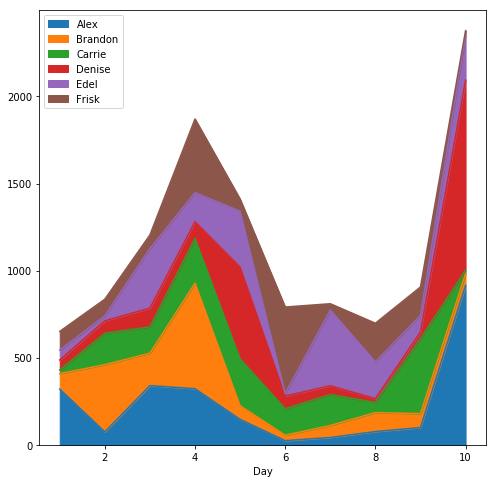

In [16]:
# Similarly, we can also do a density/area plot. (Useful for quantitative/numbers-based data.)
# We can see that Denise and Alex made up the majority of sales on Day 10 here too.
salesDF[:10].plot(kind='area', x='Day', y=salesDFColumns[1:7], figsize=(8,8))

**Correlation-based Graphing**<br/>
While our data doesn't have any correlations (randomly generated), density and scatter plots are a good way to look for correlations between two variables.

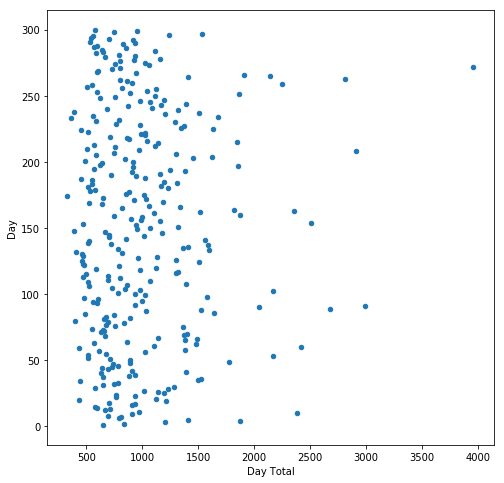

In [17]:
# Scatter plot.
salesDF.plot(kind='scatter', x='Day Total', y='Day', figsize=(8,8))

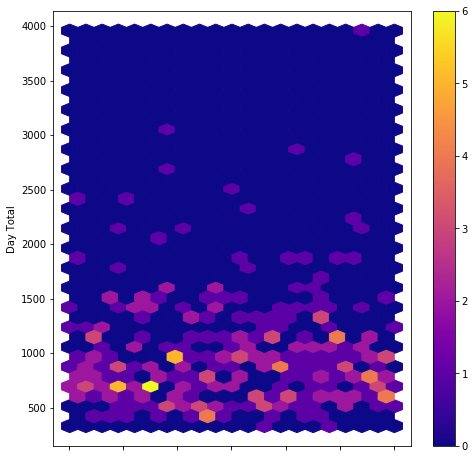

In [18]:
# Hex Plot
salesDF.plot(kind='hexbin', x='Day', y='Day Total', gridsize=(20,20), figsize=(8,8), colormap='plasma')

**Line Graph (Spaghetti Plot)**<br/>
A spaghetti plot overlays multiple lines of sales.<br/>
Spaghetti plots are great to showcase performances between Sellers, but can easily become unreadable without proper effort done to highlight particular insights.

Matplotlib Available Styles:
 ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


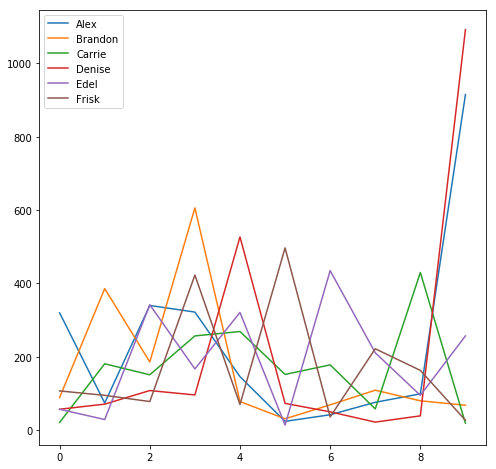

In [19]:
# Matplotlib has multiple visual palettes/styles to use in order to change the way your graphs look.
# Seaborn is another visualizer with more aesthetically pleasing palettes.
print("Matplotlib Available Styles:\n",plt.style.available)
salesDF[:10].plot(figsize=(8,8), y=salesDFColumns[1:7])

Text(-26,1100,'Sales')

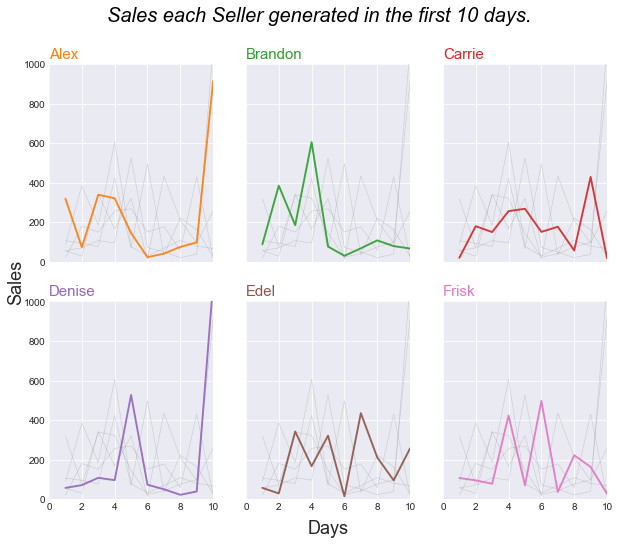

In [20]:
# Using matplotlib's example of multiple spaghetti graphs as a reference.
# https://python-graph-gallery.com/125-small-multiples-for-line-chart/
# https://matplotlib.org/gallery/color/colormap_reference.html
plt.style.use('seaborn-darkgrid') # Pick a style available through matplotlib to make out graph look nice.
palette = plt.get_cmap('tab10') # Pick the color set of lines.
salesDFShape = salesDF.shape # Get the number of rows/cols.
plt.figure(figsize=(10,8)) # Set the figure size


num = 0
for column in salesDFColumns[1:salesDFShape[1]-1]:
    # Set up the subplots.
    num += 1
    plt.subplot(2,3,num)   
    # Plot the shadows of everything else. Also make them thin and light so they don't get in the way.
    for v in salesDFColumns[1:salesDFShape[1]-1]:
        plt.plot(salesDF['Day'], salesDF[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    
    # Plot the coloured line, and set graph's x/y limits.
    plt.plot(salesDF['Day'], salesDF[column], marker='', linewidth=1.9, alpha=0.9, color=palette(num)) 
    plt.xlim(0,10) # 10 Days
    plt.ylim(0,1000) # Y-Axis that goes up to 1000 sales.
    plt.title(s=salesDFColumns[num], loc='left', fontsize=15, color=palette(num)) # Title the subplot with the seller's name.
    
    # Remove some of the x/y axis so that they're only in the far left/bottom.
    if num in range(4):
        plt.tick_params(labelbottom=False)
    if num not in [1,4,7]:
        plt.tick_params(labelleft=False)
        
# Super Title
plt.suptitle("Sales each Seller generated in the first 10 days.", fontsize=20, color='black', style='italic')
 
# Labeled Axis (Hard-coded.)
plt.text(-7, -150, 'Days', ha='center', va='center', fontsize=18)
plt.text(-26, 1100, 'Sales', ha='center', va='center', rotation='vertical', fontsize=18)

---
# Saving Your Work
Similar to importing files, `dataFrame.to_fileType("fileName.type")` exporting works for creating a product spreadsheet.

Graphs can be downloaded straight out of your notebook by saving the images.

Jupyter also supports exporting to a variety of filetypes like `.ipynb` notebooks, `.py` Python files, or `.html` HTML copies of your notebook.

In [21]:
salesDF.to_csv("Result1.csv")